# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 14/10/2020


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos de Quantificação e Desquantificação do sinal.

Construa uma função em Python que crie as tabelas com os intervalos de decisão e valores de quantificação para um quantificador uniforme. 
Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída tem dois Numpy arrays com valores de quantificação e os intervalos de decisão.


In [1]:
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy import signal
#import matplotlib.gridspec as gridspec

#def Quantific(R,Vmax,Qtype):
    
#    tamanho = 2**R
#    delta = 2*Vmax / tamanho
#    meio = delta/2
    
#    fim = meio*(tamanho-1)
    
#    if (Qtype == 'midrise'):
#        Iq = np.arange(-fim+delta, fim - meio, delta)
#        Vq = np.arange(-Vmax+delta, Vmax-meio, delta)
        
#    elif (Qtype == 'midtread'):
#        Iq = np.arange(-Vmax+delta, Vmax, delta)
#        Vq = np.arange((-Vmax-meio)+delta, fim+delta, delta)    
        
        
#    return Vq, Iq


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.gridspec as gridspec

def Quantific(R, Vmax, Qtype):
    L = 2.**R 
    delta = (2.*Vmax)/L
    delta_2 = delta/2
    v_max_posi = (L-1)*delta_2
    
    val_quantificacao = np.arange(-v_max_posi, v_max_posi+delta, delta)
    val_decisao = np.arange(-Vmax, Vmax+delta, delta)

    if(Qtype == 0): # midtread
        val_decisao[1:-1] = val_decisao[1:-1]+delta_2
        val_quantificacao = val_quantificacao+delta_2
    Vmin= -Vmax
    IQ = np.arange(Vmin, Vmax+delta/2, delta)
    Q = np.arange(Vmin+delta/2, Vmax, delta)
    return val_quantificacao, val_decisao

Verifique se a sua implementação está correta.
Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.

In [2]:
# resposta
#Vq, Iq = Quantific(3,1,'midtread')

Vq, Iq = Quantific(3,1,'midrise')


print(Vq)
print(Iq)

[-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]


In [3]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Iq - valores de quantificação e intervalos de decisão
# out: 
# xq - sinal quantificado
# prototipo da função
# xq = Quantificador(x, Vq, Iq)

def valor_perto(array, valor):
    array = np.asarray(array)
    posicao = (np.abs(array - valor)).argmin()
    return posicao


def Quantificador(x, Vq, Iq):
    
    xq = []
    
    for valor in range(len(x)):
        posicao = valor_perto(Vq, x[valor])
        
        #nao foi preciso a utilizacao dos intervalos de decisao
        #pois a funcao valor_perto  da exatamente o valor preciso
        #senao a seguinte linha de codigo seria necessaria 
        
        #if (numero < Iq[posicao]):
        #   xq.append(Vq[posicao])
        #else:
        #   xq.append(Vq[posicao-1])
        
        xq.append(Vq[posicao])
                        
    return xq
              

Vq = np.array([-0.75, -0.25, 0.25, 0.75])
Iq = np.array([-0.5, 0, 0.5,1])
x = [0.1, 0.6, -0.8]
xq = Quantificador(x, Vq, Iq)
print(xq)
#xq = [0.25, 0.75, -0.75]

[0.25, 0.75, -0.75]


Construa um sinal de rampa 
$$ x(t)=   \left\{
\begin{array}{ll}
      0 & ,\, t < 0 \\
      1000 t & ,\, 0 < t < 10^{-3} \\
       0 & ,\, 10^{-3} < t  \\
\end{array} 
\right.  $$

no intervalo $0<t<1\,ms$.
Represente o sinal x(t), o sinal quantificado e o sinal de erro.

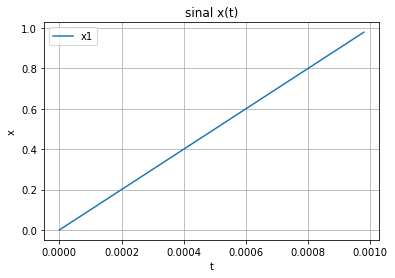

In [4]:
#Frequência
Fs = 48000
#Período
Ts = 1/Fs
# x entre 0 e 1
#começa no 0, acaba no 1, Ts = espaçamento entre valores
t = np.arange(0,0.001,Ts)

#construcao x(t)
x = 1000*t

#representacao x(t)
plt.plot(t,x)
plt.title("sinal x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(["x1"])
plt.grid(True)
plt.show()


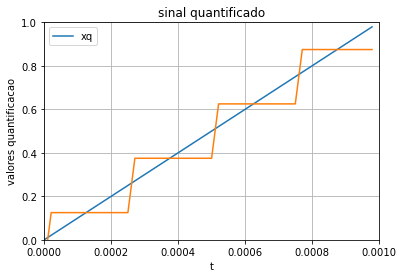

In [5]:
plt.plot(t,x)

Vq, Iq = Quantific(3,1,'midrise')
xq = Quantificador(x, Vq,Iq)
plt.plot(t,xq)

#Vq, Iq = Quantific(3,1,'midtread')
#xqs = Quantificador(x, Vq,Iq)
#plt.plot(t,xqs)

plt.axis([0,0.001,0,1])
plt.title("sinal quantificado")
plt.xlabel("t")
plt.ylabel("valores quantificacao")
plt.legend(["xq"])
plt.grid()
plt.show()


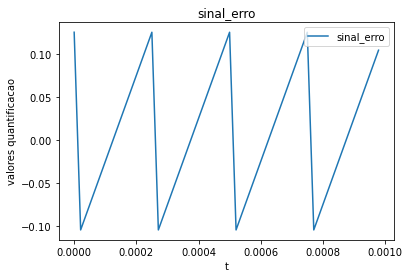

In [6]:
sinal_erro = np.subtract(x, xq)
#print(sinal_erro)

#representacao sinal de erro
plt.plot(t, sinal_erro)
plt.title("sinal_erro")
plt.xlabel("t")
plt.ylabel("valores quantificacao")
plt.legend(["sinal_erro"])
plt.show()

Represente o histograma do sinal de erro. Comente os resultados.

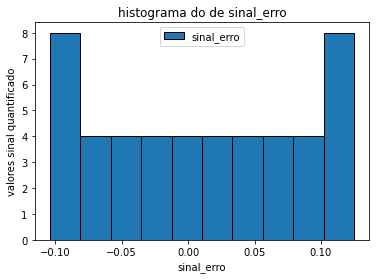

In [7]:
# resposta

plt.hist(sinal_erro, edgecolor="black" )

plt.title("histograma do de sinal_erro")
plt.xlabel("sinal_erro")
plt.ylabel("valores sinal quantificado")
plt.legend(["sinal_erro"])
plt.show()

Resposta

Como se pode ver pelo histograma o erro de todos os valores do sinal quantificado equivale a zero, pois os niveis de quantificacao equivalem exatamente aos pontos do sinal amostrado, como o calculo do de sinal de erro = x(n) - xq(n), fica claro que nao ha discrepancia alguma entre os sinais quantificados e amostrados.